<a href="https://colab.research.google.com/github/mcoviino/IAE_METZ_DATA_Grp4/blob/main/DATA_GRP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Définition des tickers et de la période d'analyse
ETF_symbol = "IWDA.AS"
FCP_symbol = "0P0001D3JD.F"
SICAV_symbol = "0P00014NXZ.F"

start_date = "2020-01-01"
end_date = "2025-01-01"

In [3]:
# Téléchargement des données via yfinance
print("Téléchargement des données en cours...")
ETF_data = yf.download(ETF_symbol, start=start_date, end=end_date)
FCP_data = yf.download(FCP_symbol, start=start_date, end=end_date)
SICAV_data = yf.download(SICAV_symbol, start=start_date, end=end_date)

Téléchargement des données en cours...
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
print(ETF_data)
print(FCP_data)
print(SICAV_data)

Price            Close        High         Low        Open  Volume
Ticker         IWDA.AS     IWDA.AS     IWDA.AS     IWDA.AS IWDA.AS
Date                                                              
2020-01-02   56.715000   56.939999   56.570000   56.584999   72586
2020-01-03   56.685001   56.785000   56.349998   56.595001   81021
2020-01-06   56.529999   56.590000   56.105000   56.470001   79746
2020-01-07   56.900002   56.959999   56.669998   56.810001   64791
2020-01-08   57.080002   57.080002   56.615002   56.695000   75533
...                ...         ...         ...         ...     ...
2024-12-23  103.974998  104.379997  103.639999  104.250000  160080
2024-12-24  104.860001  104.959999  104.665001  104.824997   65615
2024-12-27  104.489998  105.449997  104.199997  105.129997  149643
2024-12-30  103.934998  104.500000  103.209999  104.290001  180593
2024-12-31  104.160004  104.209999  103.584999  103.684998   74153

[1283 rows x 5 columns]
Price             Close         High 

In [5]:
# Vérification de la disponibilité des données
data = {"ETF": ETF_data, "FCP": FCP_data, "SICAV": SICAV_data}
for name, df in data.items():
    if df.empty:
        print(f"Aucune donnée trouvée pour {name} ! Vérifiez le ticker sur Yahoo Finance.")
    else:
        print(f"\nDonnées trouvées pour {name} :")
        print(df.head())


Données trouvées pour ETF :
Price           Close       High        Low       Open  Volume
Ticker        IWDA.AS    IWDA.AS    IWDA.AS    IWDA.AS IWDA.AS
Date                                                          
2020-01-02  56.715000  56.939999  56.570000  56.584999   72586
2020-01-03  56.685001  56.785000  56.349998  56.595001   81021
2020-01-06  56.529999  56.590000  56.105000  56.470001   79746
2020-01-07  56.900002  56.959999  56.669998  56.810001   64791
2020-01-08  57.080002  57.080002  56.615002  56.695000   75533

Données trouvées pour FCP :
Price             Close         High          Low         Open       Volume
Ticker     0P0001D3JD.F 0P0001D3JD.F 0P0001D3JD.F 0P0001D3JD.F 0P0001D3JD.F
Date                                                                       
2022-03-07      9.72691      9.72691      9.72691      9.72691            0
2022-03-08      9.71674      9.71674      9.71674      9.71674            0
2022-03-09      9.68855      9.68855      9.68855      9.6

In [6]:
# Ne garder que la colonne 'Close' et renommer les colonnes
ETF_data = ETF_data[['Close']].rename(columns={'Close': f'ETF_{ETF_symbol}'})
FCP_data = FCP_data[['Close']].rename(columns={'Close': f'FCP_{FCP_symbol}'})
SICAV_data = SICAV_data[['Close']].rename(columns={'Close': f'SICAV_{SICAV_symbol}'})


In [7]:
# Fusion des trois DataFrames en un seul
prix_fonds = pd.concat([ETF_data, FCP_data, SICAV_data], axis=1)
if prix_fonds.empty:
    raise ValueError("Le DataFrame prix_fonds est vide. Vérifiez les tickers et la récupération des données.")

print("\nAperçu du DataFrame fusionné (prix_fonds) :")
print(prix_fonds.head())


Aperçu du DataFrame fusionné (prix_fonds) :
Price      ETF_IWDA.AS FCP_0P0001D3JD.F SICAV_0P00014NXZ.F
Ticker         IWDA.AS     0P0001D3JD.F       0P00014NXZ.F
Date                                                      
2020-01-02   56.715000              NaN            1.15226
2020-01-03   56.685001              NaN            1.14878
2020-01-06   56.529999              NaN            1.14645
2020-01-07   56.900002              NaN            1.14859
2020-01-08   57.080002              NaN            1.15145


In [8]:
# Calcul des rendements quotidiens pour chaque colonne
rendements_fonds = prix_fonds.pct_change(fill_method=None).dropna()

In [9]:
# Définition des taux d'imposition selon les pays
impots_pays = {
    "France": 0.25,       # 25% d'imposition
    "Luxembourg": 0.17,   # 17% d'imposition
    "Irlande": 0.125      # 12.5% d'imposition
}

In [10]:
# Calcul des rendements nets après impôts pour chaque pays

rendements_nets_pays = {}
for pays, taux in impots_pays.items():
    rendements_nets = rendements_fonds * (1 - taux)
    rendements_nets_pays[pays] = rendements_nets

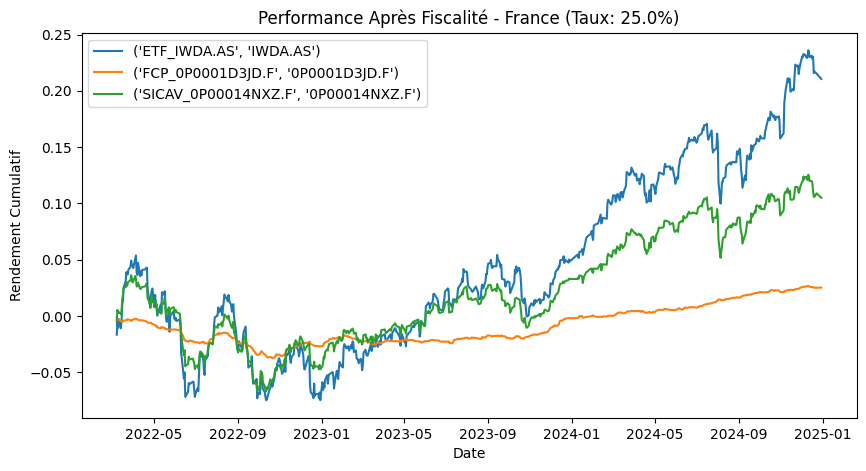

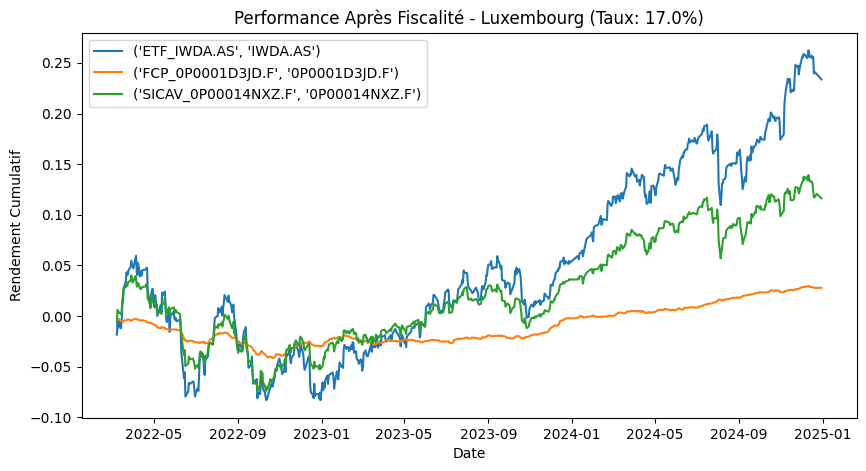

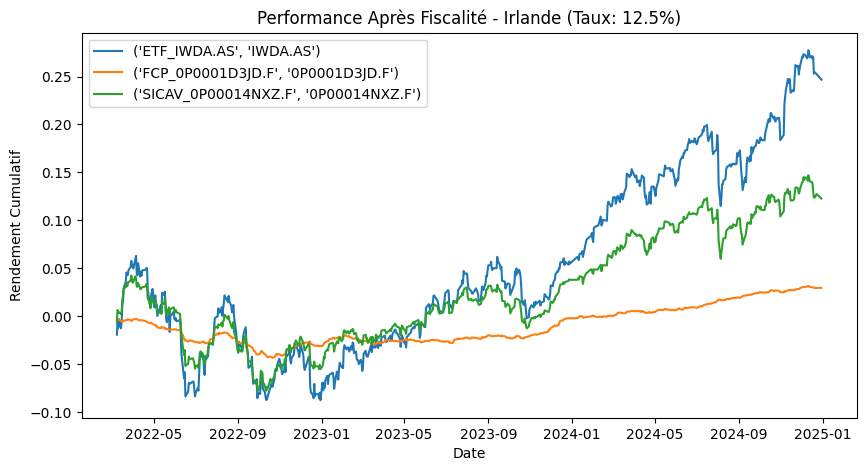

In [11]:
# Affichage des performances après fiscalité pour chaque pays

for pays, df in rendements_nets_pays.items():
    plt.figure(figsize=(10, 5))
    for column in df.columns:
        performance_cumulee = (1 + df[column]).cumprod() - 1
        plt.plot(performance_cumulee, label=str(column))
    plt.title(f"Performance Après Fiscalité - {pays} (Taux: {impots_pays[pays]*100:.1f}%)")
    plt.xlabel("Date")
    plt.ylabel("Rendement Cumulatif")
    plt.legend()
    plt.show()

In [12]:
# Affichage des données finales
for pays, df in rendements_nets_pays.items():
    print(f"\nRendements Nets des Fonds en {pays} :")
    print(df.head())



Rendements Nets des Fonds en France :
Price      ETF_IWDA.AS FCP_0P0001D3JD.F SICAV_0P00014NXZ.F
Ticker         IWDA.AS     0P0001D3JD.F       0P00014NXZ.F
Date                                                      
2022-03-08   -0.016554        -0.000784          -0.004618
2022-03-09    0.011233        -0.002176           0.010108
2022-03-10   -0.004936        -0.000101          -0.002486
2022-03-11    0.007845        -0.000156           0.000656
2022-03-14   -0.008230        -0.000991          -0.001890

Rendements Nets des Fonds en Luxembourg :
Price      ETF_IWDA.AS FCP_0P0001D3JD.F SICAV_0P00014NXZ.F
Ticker         IWDA.AS     0P0001D3JD.F       0P00014NXZ.F
Date                                                      
2022-03-08   -0.018320        -0.000868          -0.005111
2022-03-09    0.012431        -0.002408           0.011186
2022-03-10   -0.005462        -0.000112          -0.002751
2022-03-11    0.008682        -0.000172           0.000726
2022-03-14   -0.009108        -0.

In [13]:
# Calcul des rendements cumulés AVANT et APRES fiscalité
rendements_cumules = (1 + rendements_fonds).cumprod() - 1
rendements_cumules_nets = {pays: (1 + df).cumprod() - 1 for pays, df in rendements_nets_pays.items()}


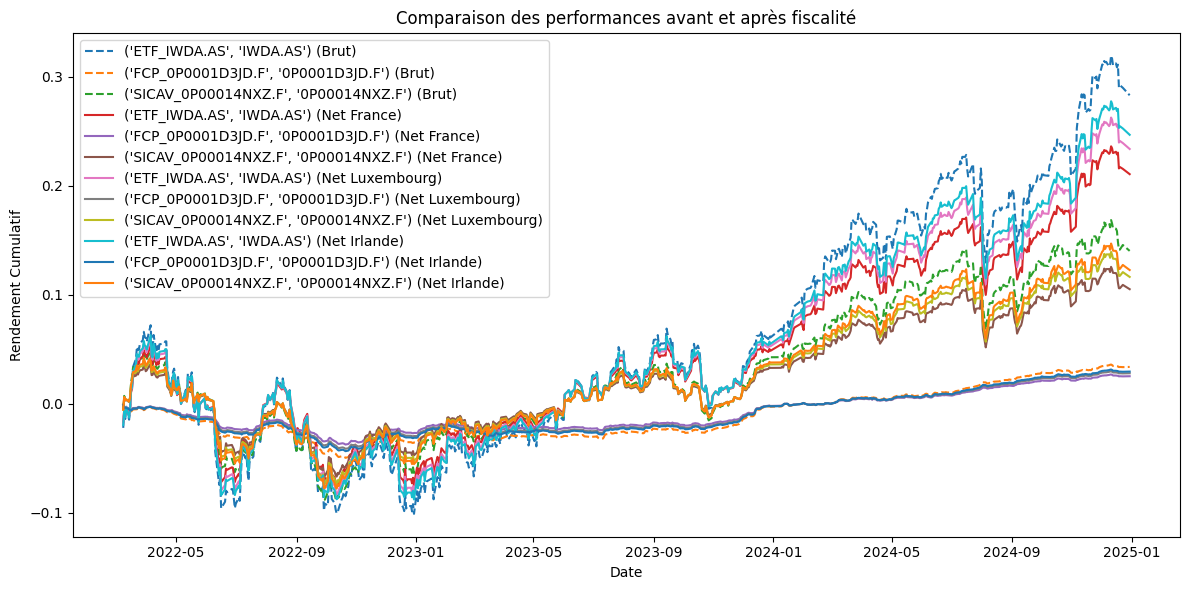

In [14]:
# Comparaison sur un même graphique
plt.figure(figsize=(12, 6))
for column in rendements_cumules.columns:
    plt.plot(rendements_cumules[column], label=f"{column} (Brut)", linestyle="dashed")

for pays, df in rendements_cumules_nets.items():
    for column in df.columns:
        plt.plot(df[column], label=f"{column} (Net {pays})")

plt.title("Comparaison des performances avant et après fiscalité")
plt.xlabel("Date")
plt.ylabel("Rendement Cumulatif")
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
# Moyenne et volatilité des rendements avant et après impôt
stats_fonds = {
    "Brut": rendements_fonds.describe().loc[['mean', 'std']].T
}

for pays, df in rendements_nets_pays.items():
    stats_fonds[pays] = df.describe().loc[['mean', 'std']].T

In [16]:
# Création d'un DataFrame récapitulatif
stats_comparatif = pd.concat(stats_fonds, axis=1)
stats_comparatif.columns = ['Moyenne Brute', 'Volatilité Brute'] + \
                           [f"Moyenne {pays}" for pays in impots_pays.keys()] + \
                           [f"Volatilité {pays}" for pays in impots_pays.keys()]

In [17]:
# Calcul du ratio de Sharpe avant et après fiscalité (on suppose un taux sans risque à 0)
ratio_sharpe = {
    "Brut": (rendements_fonds.mean() / rendements_fonds.std()).to_frame(name="Ratio Sharpe Brut")
}

for pays, df in rendements_nets_pays.items():
    ratio_sharpe[pays] = (df.mean() / df.std()).to_frame(name=f"Ratio Sharpe {pays}")

In [18]:
# Création d'un DataFrame récapitulatif
sharpe_comparatif = pd.concat(ratio_sharpe, axis=1) # Change stats_fonds to ratio_sharpe
sharpe_comparatif.columns = ['Ratio de Sharpe Brute'] + \
                           [f"Ratio de Sharpe {pays}" for pays in impots_pays.keys()]

In [19]:
# Affichage des statistiques comparatives et des ratios de Sharpe
print("\nComparaison des rendements avant/après fiscalité :")
print(stats_comparatif)

print("\nComparaison des Ratios de Sharpe :")
print(sharpe_comparatif)


Comparaison des rendements avant/après fiscalité :
                                 Moyenne Brute  Volatilité Brute  \
Price              Ticker                                          
ETF_IWDA.AS        IWDA.AS            0.000416          0.008300   
FCP_0P0001D3JD.F   0P0001D3JD.F       0.000051          0.000803   
SICAV_0P00014NXZ.F 0P00014NXZ.F       0.000213          0.004986   

                                 Moyenne France  Moyenne Luxembourg  \
Price              Ticker                                             
ETF_IWDA.AS        IWDA.AS             0.000312            0.006225   
FCP_0P0001D3JD.F   0P0001D3JD.F        0.000038            0.000602   
SICAV_0P00014NXZ.F 0P00014NXZ.F        0.000160            0.003739   

                                 Moyenne Irlande  Volatilité France  \
Price              Ticker                                             
ETF_IWDA.AS        IWDA.AS              0.000345           0.006889   
FCP_0P0001D3JD.F   0P0001D3JD.F       

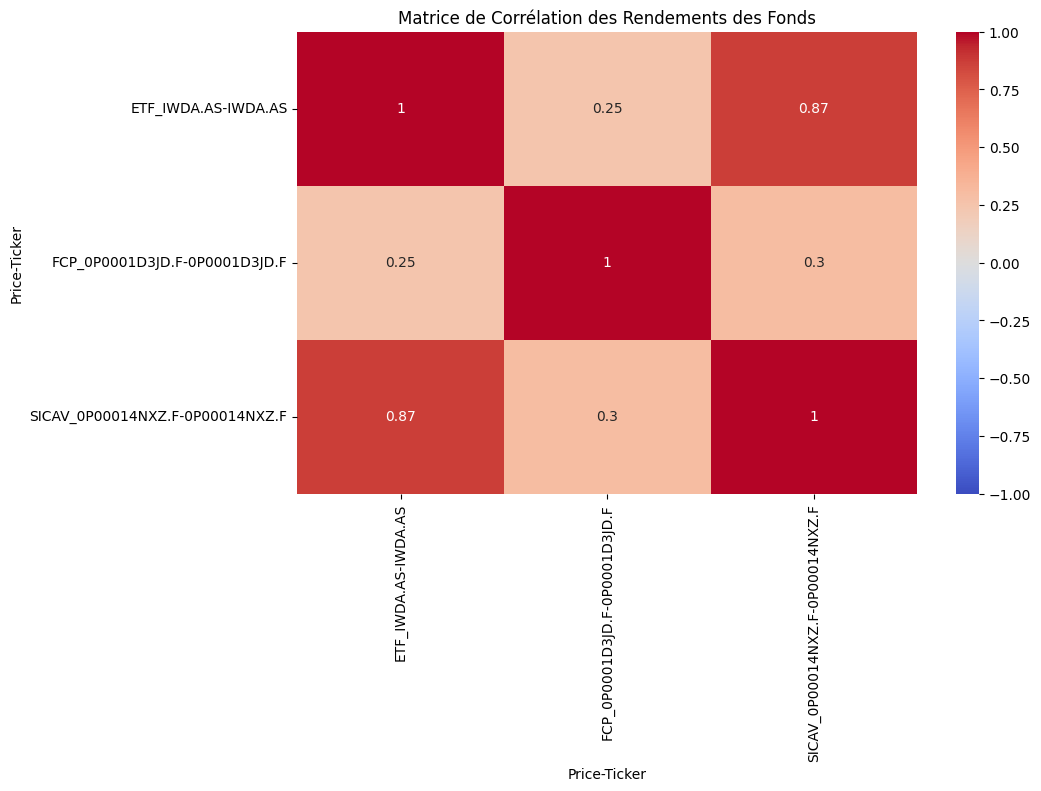

In [20]:
# Matrice de corrélation des rendements
plt.figure(figsize=(10, 6))
sns.heatmap(rendements_fonds.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de Corrélation des Rendements des Fonds')
plt.show()

In [21]:
# Supposons un taux sans risque annuel à 2%
taux_sans_risque_annuel = 0.02
taux_sans_risque_quotidien = taux_sans_risque_annuel / 252

In [23]:
# Ratio Sortino avant fiscalité
rendements_negatifs = rendements_fonds[rendements_fonds < 0].std() * np.sqrt(252)
sortino_brut = ((rendements_fonds.mean() * 252) - taux_sans_risque_annuel) / rendements_negatifs

print("\nRatio Sortino Brut (avant impôts):")
print(sortino_brut)



Ratio Sortino Brut (avant impôts):
Price               Ticker      
ETF_IWDA.AS         IWDA.AS         0.849270
FCP_0P0001D3JD.F    0P0001D3JD.F   -0.725261
SICAV_0P00014NXZ.F  0P00014NXZ.F    0.568991
dtype: float64


In [24]:
# Ratio Sortino après fiscalité par pays
for pays, df in rendements_nets_pays.items():
    rendements_negatifs_net = df[df < 0].std() * np.sqrt(252)
    sortino_net = ((df.mean() * 252) - taux_sans_risque_annuel) / rendements_negatifs_net
    print(f"\nRatio Sortino Net en {pays}:")
    print(sortino_net)


Ratio Sortino Net en France:
Price               Ticker      
ETF_IWDA.AS         IWDA.AS         0.782432
FCP_0P0001D3JD.F    0P0001D3JD.F   -1.405728
SICAV_0P00014NXZ.F  0P00014NXZ.F    0.456424
dtype: float64

Ratio Sortino Net en Luxembourg:
Price               Ticker      
ETF_IWDA.AS         IWDA.AS         0.808200
FCP_0P0001D3JD.F    0P0001D3JD.F   -1.143379
SICAV_0P00014NXZ.F  0P00014NXZ.F    0.499823
dtype: float64

Ratio Sortino Net en Irlande:
Price               Ticker      
ETF_IWDA.AS         IWDA.AS         0.820625
FCP_0P0001D3JD.F    0P0001D3JD.F   -1.016889
SICAV_0P00014NXZ.F  0P00014NXZ.F    0.520748
dtype: float64


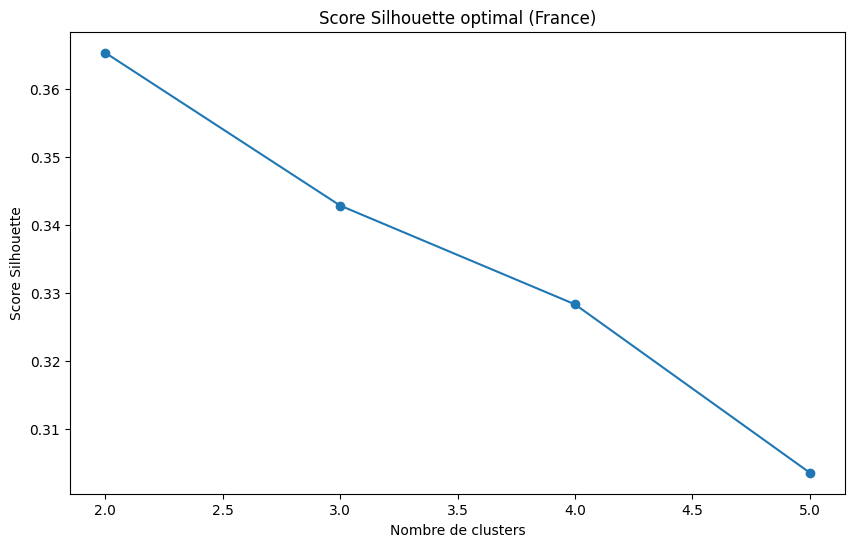

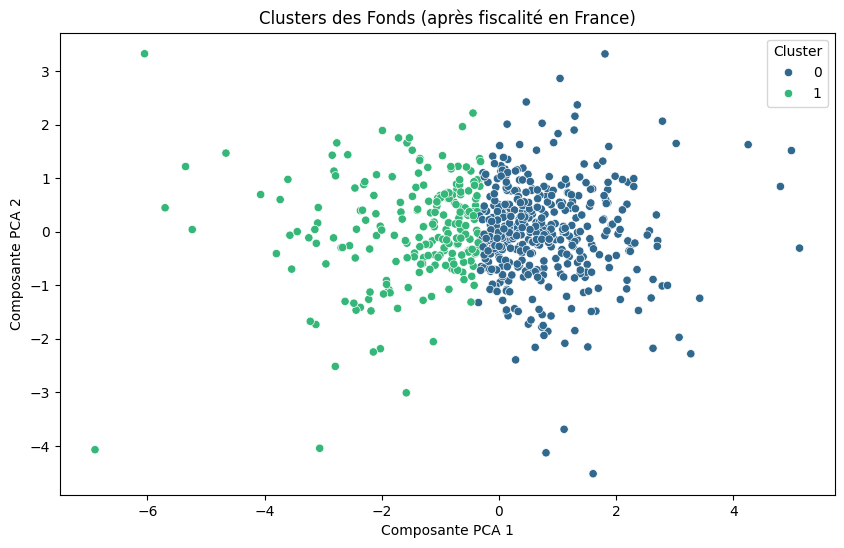


Résumé des clusters après fiscalité (France) :
Price   ETF_IWDA.AS FCP_0P0001D3JD.F SICAV_0P00014NXZ.F
Ticker      IWDA.AS     0P0001D3JD.F       0P00014NXZ.F
Cluster                                                
0          0.003395         0.000187           0.002085
1         -0.005608        -0.000246          -0.003537


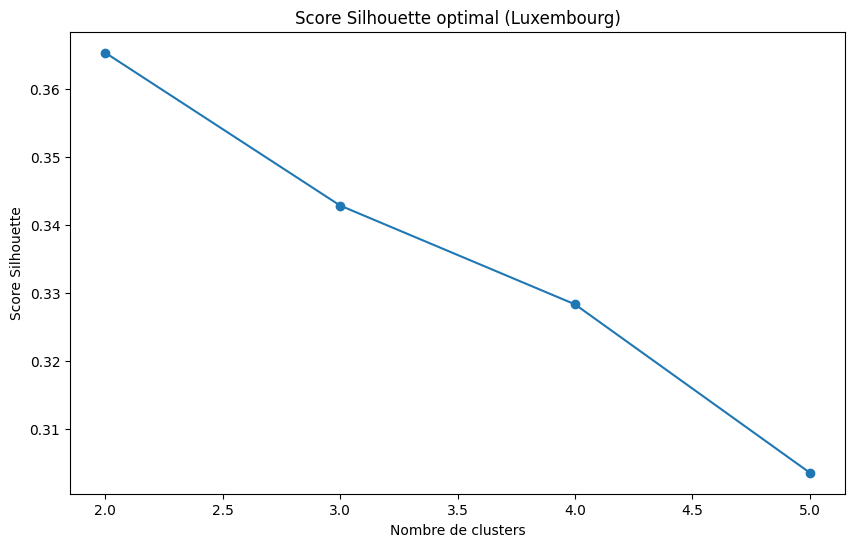

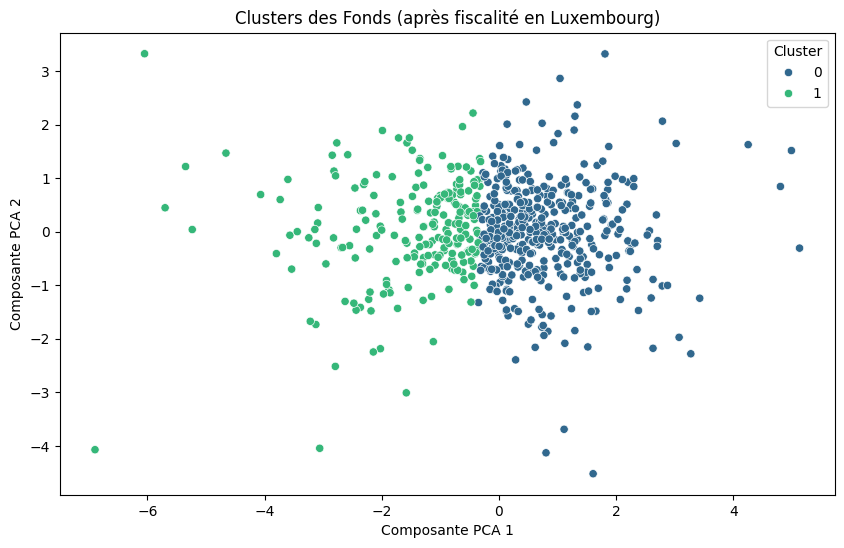


Résumé des clusters après fiscalité (Luxembourg) :
Price   ETF_IWDA.AS FCP_0P0001D3JD.F SICAV_0P00014NXZ.F
Ticker      IWDA.AS     0P0001D3JD.F       0P00014NXZ.F
Cluster                                                
0          0.003757         0.000207           0.002308
1         -0.006206        -0.000272          -0.003914


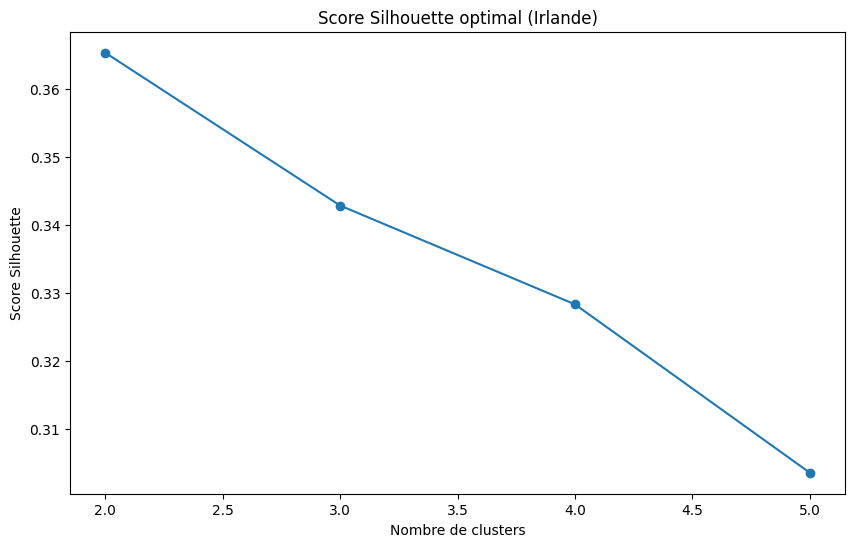

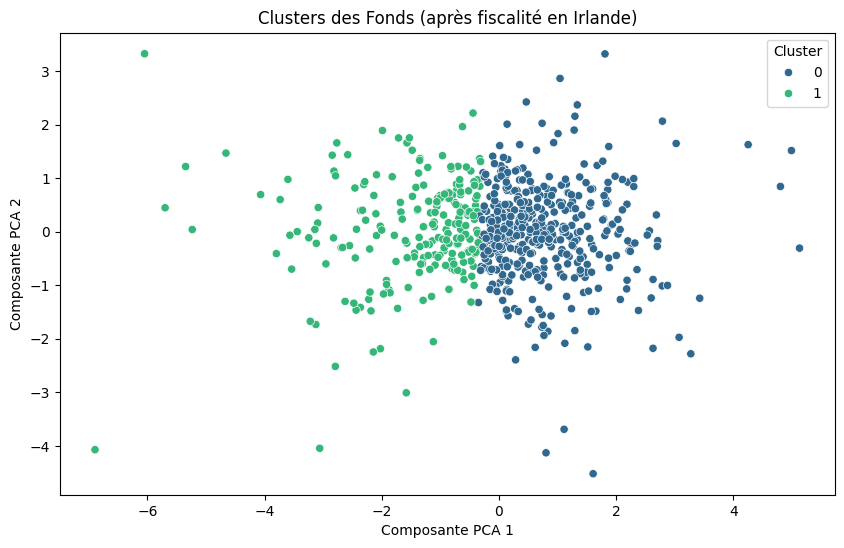


Résumé des clusters après fiscalité (Irlande) :
Price   ETF_IWDA.AS FCP_0P0001D3JD.F SICAV_0P00014NXZ.F
Ticker      IWDA.AS     0P0001D3JD.F       0P00014NXZ.F
Cluster                                                
0          0.003961         0.000218           0.002433
1         -0.006543        -0.000287          -0.004126


In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Fonction pour le clustering selon le pays
def clustering_fonds_pays(rendements_nets, pays, n_clusters_range=(2,6)):
    scaler = StandardScaler()
    rendements_standardises = scaler.fit_transform(rendements_nets.dropna())

    pca = PCA(n_components=2)
    rendements_pca = pca.fit_transform(rendements_standardises)

    # Calcul du score silhouette pour déterminer le nombre optimal de clusters
    scores_silhouette = []
    for k in range(*n_clusters_range):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(rendements_pca)
        score = silhouette_score(rendements_pca, labels)
        scores_silhouette.append(score)

    # Graphique des scores silhouette
    plt.figure(figsize=(10, 6))
    plt.plot(range(*n_clusters_range), scores_silhouette, marker='o')
    plt.title(f'Score Silhouette optimal ({pays})')
    plt.xlabel('Nombre de clusters')
    plt.ylabel('Score Silhouette')
    plt.show()

    # Choisir le nombre optimal de clusters selon le meilleur score silhouette
    optimal_clusters = np.argmax(scores_silhouette) + n_clusters_range[0]
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
    labels_clusters = kmeans.fit_predict(rendements_pca)

    # Graphique des clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=rendements_pca[:,0], y=rendements_pca[:,1], hue=labels_clusters, palette='viridis')
    plt.title(f'Clusters des Fonds (après fiscalité en {pays})')
    plt.xlabel('Composante PCA 1')
    plt.ylabel('Composante PCA 2')
    plt.legend(title='Cluster')
    plt.show()

    # Résumé statistique par cluster
    df_clusters = pd.DataFrame(rendements_nets.iloc[:len(labels_clusters)])
    df_clusters['Cluster'] = labels_clusters
    resume_clusters = df_clusters.groupby('Cluster').mean()
    print(f"\nRésumé des clusters après fiscalité ({pays}) :")
    print(resume_clusters)

# Appliquer la fonction aux différents pays
pays_a_traiter = ['France', 'Luxembourg', 'Irlande']
for pays in pays_a_traiter:
    clustering_fonds_pays(rendements_nets_pays[pays], pays)